# <span style="color:black"> LSN-Esercitazione numerica 8</span>

## <span style="color:blue">  Esercizio 08.1 - 08.2</span>

Ho implementato lo studio dell'ottimizzazione variazionale del ground state di una particella singola quantistica che risente del potenziale esterno:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
Ho preso come funzione d'onda variazionale di prova la somma di due gaussiane:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Per andare a studiare a ricavare i valori di $\mu$ e $\sigma$ che minimizzano il valor medio di energia ho costruito un codice che produca un "simulated annealing": si è scelta una temperatura iniziale (pari a 20) e si è andato ad abbassare lentamente la temperatura del sistema dividendo ogni volta la temperatura di un fattore 0.1, studiando 100 temperature differenti. Per ognuna di esse si propongo 300 nuove coppie dei due parametri scegliendo casualmente in modo uniforme su un intervallo centrato nei parametri stessi. Ho implementato la scelta dei nuovi parametri proposti con una probabilità pari a 
$$
p=min\left\{1, e^{-\beta\left[ E(x_{new})-E(x) \right]} \right\},
$$
dove la funzione costo E è descritta dalla media di $\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$ calcolata su 100 posizione legate una all'altra con uno step Monte Carlo, con stessa posizione iniziale per entrambe le configurazioni. 

Una volta ricavati i migliori valori di $\mu$ e $\sigma$ ho scritto un codice Monte Carlo variazionale per una particella quantistica singola 1D che sfruttasse l'algoritmo di Metropolis per campionare la funzione d'onda di prova.
Ho implementato la probabilità di transizione $p=min\left\{1,\frac{\left|\psi(x_1)\right|^2}{\left|\psi(x_0)\right|^2}\right\}$.

Descrivo i risultati attraveso il Data-blocking formato da 50 blocchi con, ognuno, 1000 step Monte Carlo. Ho scelto un passo per la descrizione della probabilità di transizione uniforme $T(x_{new}|x_{old})$ tale da raggiungere dei rapporti di accettazione prossimi al 50%.
Plotto, infine, l'istogramma che descrive la distribuzione di probabilità data dal modulo quadro della funzione d'onda descritta: lo paragono con la funzione analitica del modulo quadro valutata con i parametri variazionali ricavati in precedenza e con la soluzione numerica ottenuta trasformando l'equazione di Schrodinger in un'equazione matriciale.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.gridspec as gridspec
import scipy.optimize as opt

In [2]:
blk, ene, err_ene = np.loadtxt('output.ene.dat', usecols=(0,2,3), unpack='true')

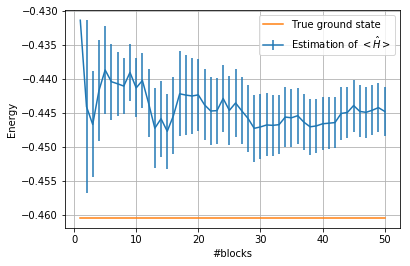

In [3]:
plt.errorbar(blk,ene,yerr=err_ene, label="Estimation of $ <{\hat H} >$")
plt.plot(blk, -0.46046587969271563+blk-blk, label="True ground state")
plt.xlabel('#blocks')
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
b,h = np.loadtxt('output.histo.dat', usecols=(0,1), unpack='true')

L'energia minima stimata attraverso il metodo variazionale applicato alla funzione di prova è $E=-0.444792$.
Tale valore resta comunque maggiore del vero ground state.
I valori stimati per $\mu$ e $\sigma$ ottimizzando il valor medio dell'hamiltoniana sono:
$$
\mu=0.801502  \quad, \quad
\sigma=0.625213
$$

In [5]:
mu=0.801502
sigma=0.625213
def fz(x):
    return np.exp((-(x-mu)**2)/(2*sigma*sigma))+np.exp((-(x+mu)**2)/(2*sigma*sigma))

def fz2(x):
    return fz(x)*fz(x)

norm=2*math.sqrt(math.pi)*sigma*(np.exp(-(mu/sigma)**2)+1)

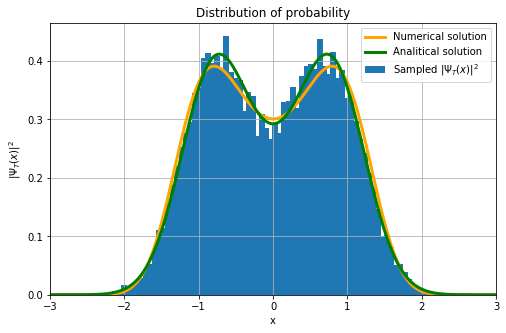

In [7]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#print("Ground state energy: ", E[0])
#print("1st excited state energy: ", E[1])
#print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
#plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, color="orange", label="Numerical solution", linewidth=3)
plt.bar(b,h, align='center', width=0.08, label="Sampled $|\Psi_T(x)|^2$")
plt.plot(x, fz2(x)/norm, label="Analitical solution", color="green", linewidth=3)

#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
plt.title("Distribution of probability")
plt.xlabel("x")
plt.ylabel("$|\Psi_T(x)|^2$")
plt.grid(True)
plt.xlim((-3,3))
#plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

La distribuzione di propabilità è compatibile con quella analitica: il valore di energia trovato, però, è leggermente più elevato, questo poichè con il metodo variazionale ho minimizzato l'energia media calcolata sulla funzione d'onda variazionale di prova ma la funzione d'onda del vero ground state non è descritto in modo analitico dalla somma di due gaussiane.

## <span style="color:blue">  Esercizio 08.3</span>

Ho utilizzato il codice formito per simulare lo stesso sistema con i metodi di Path Integral Ground State (PIGS) a temperatura nulla $T=0$, e Path Integral Monte Carlo (PIMC) per temperatura finita $T>0$. 
Il codice è stato usato come fornito, aggiungendo semplicemente la descrizione matematica del sistema in esame, ovvero si è aggiunta la formula per il calcolo del potenziale esterno con le sue derivate prima e seconda e il calcolo della funzione di prova usata negli esercizi precedenti con la sua derivate seconda.
Descrivo i risultati utilizzando come funzione d'onda la costante unitaria e la funzione variazionale ricavata precedentemente.

### PIGS Algorithm (T=0)

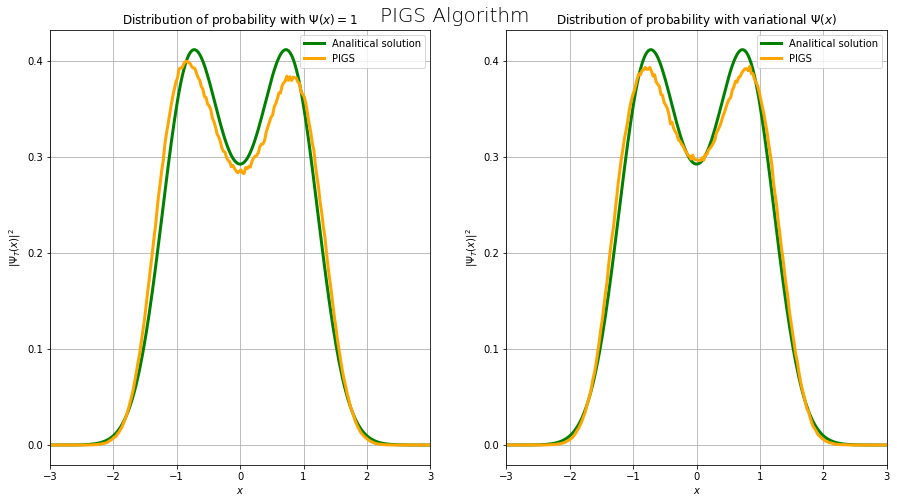

In [8]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('PIGS Algorithm', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(1, 2, figure=fig)

y, psi2 = np.loadtxt("QMC_1D/Cost_PIGS/T2/probability.dat", usecols=(0,1), unpack='true')

ax = fig.add_subplot(gs[0, 0])
#ax.bar(b,h, align='center', width=0.08, label="Sampled |$\Psi_T(x)|^2$")
plt.plot(y, fz2(y)/norm, label="Analitical solution", color="green", linewidth=3)
plt.title("Distribution of probability with $\Psi(x)=1$")
plt.xlabel(r'$x$')
plt.ylabel("$|\Psi_T(x)|^2$")
plt.plot(y,psi2, label='PIGS', color="orange", linewidth=3)
plt.grid(True)
plt.xlim((-3,3))
plt.legend()

z2, psi2var2 = np.loadtxt("QMC_1D/Var_PIGS/T2/probability.dat", usecols=(0,1), unpack='true')
ax2 = fig.add_subplot(gs[0, 1])
#ax.bar(b,h, align='center', width=0.08, label="Sampled |$\Psi_T(x)|^2$")
plt.plot(z2, fz2(y)/norm, label="Analitical solution", color="green", linewidth=3)
plt.title("Distribution of probability with variational $\Psi(x)$")
plt.xlabel(r'$x$')
plt.ylabel("$|\Psi_T(x)|^2$")
plt.plot(z2,psi2var2, label='PIGS', color="orange", linewidth=3)
plt.grid(True)
plt.xlim((-3,3))
plt.legend()

plt.show()

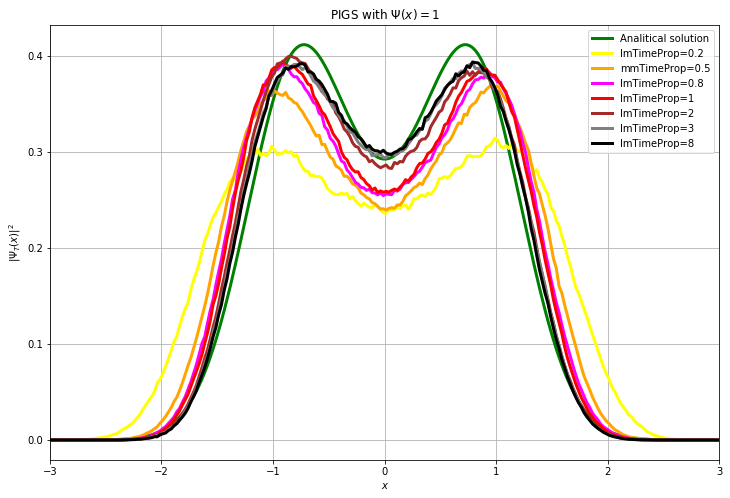

In [16]:
z05, psi2cost05 = np.loadtxt("QMC_1D/Cost_PIGS/T05/probability.dat", usecols=(0,1), unpack='true')
z02, psi2cost02 = np.loadtxt("QMC_1D/Cost_PIGS/T02/probability.dat", usecols=(0,1), unpack='true')
z08, psi2cost08 = np.loadtxt("QMC_1D/Cost_PIGS/T08/probability.dat", usecols=(0,1), unpack='true')
z1, psi2cost1 = np.loadtxt("QMC_1D/Cost_PIGS/T1/probability.dat", usecols=(0,1), unpack='true')
z2, psi2cost2 = np.loadtxt("QMC_1D/Cost_PIGS/T2/probability.dat", usecols=(0,1), unpack='true')
z3, psi2cost3 = np.loadtxt("QMC_1D/Cost_PIGS/T3/probability.dat", usecols=(0,1), unpack='true')
z8, psi2cost8 = np.loadtxt("QMC_1D/Cost_PIGS/T8/probability.dat", usecols=(0,1), unpack='true')


plt.figure(figsize=(12,8))
#plt.bar(b,h, align='center', width=0.08, label="Sampled |$\Psi_T(x)|^2$")
plt.plot(y, fz2(y)/norm, label="Analitical solution", color="green", linewidth=3)
plt.title('PIGS with $\Psi(x)=1$')
plt.xlabel(r'$x$')
plt.ylabel("$|\Psi_T(x)|^2$")
plt.plot(z02,psi2cost02, label="ImTimeProp=0.2", color="yellow", linewidth=3)
plt.plot(z05,psi2cost05, label="mmTimeProp=0.5", color="orange", linewidth=3)
plt.plot(z08,psi2cost08, label="ImTimeProp=0.8", color="magenta", linewidth=3)
plt.plot(z1,psi2cost1, label="ImTimeProp=1", color="red", linewidth=3)
plt.plot(z2,psi2cost2, label="ImTimeProp=2", color="brown", linewidth=3)
plt.plot(z3,psi2cost3, label="ImTimeProp=3", color="grey", linewidth=3)
plt.plot(z8,psi2cost8, label="ImTimeProp=8", color="black", linewidth=3)


plt.grid(True)
plt.xlim((-3,3))
plt.legend()
plt.show()

Utilizzando come funzione d'onda quella costante, notevolmente differente da quella di ground state, è necessario un tempo immaginario di propagazione diverso da zero per arrivare a campionare l'esatto moto di punto zero. Tale condizione è verificata per tempi immaginari di propagazione maggiori di 2. L'algoritmo pur non conoscendo la funzione di ground state riesce a campionarla su questi tempi scala.

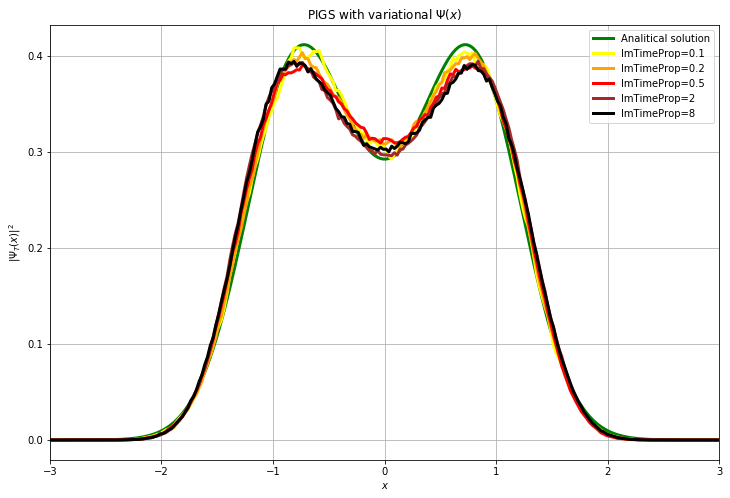

In [15]:
w05, psi2var05 = np.loadtxt("QMC_1D/Var_PIGS/T05/probability.dat", usecols=(0,1), unpack='true')
w02, psi2var02 = np.loadtxt("QMC_1D/Var_PIGS/T02/probability.dat", usecols=(0,1), unpack='true')
w01, psi2var01 = np.loadtxt("QMC_1D/Var_PIGS/T01/probability.dat", usecols=(0,1), unpack='true')
w2, psi2var2 = np.loadtxt("QMC_1D/Var_PIGS/T2/probability.dat", usecols=(0,1), unpack='true')
w8, psi2var8 = np.loadtxt("QMC_1D/Var_PIGS/T8/probability.dat", usecols=(0,1), unpack='true')


plt.figure(figsize=(12,8))
#plt.bar(b,h, align='center', width=0.08, label="Sampled |$\Psi_T(x)|^2$")
plt.plot(y, fz2(y)/norm, label="Analitical solution", color="green", linewidth=3)
plt.title('PIGS with variational $\Psi(x)$')
plt.xlabel(r'$x$')
plt.ylabel("$|\Psi_T(x)|^2$")
plt.plot(w01,psi2var01, label="ImTimeProp=0.1", color="yellow", linewidth=3)
plt.plot(w02,psi2var02, label="ImTimeProp=0.2", color="orange", linewidth=3)
plt.plot(w05,psi2var05, label="ImTimeProp=0.5", color="red", linewidth=3)
plt.plot(w2,psi2var2, label="ImTimeProp=2", color="brown", linewidth=3)
plt.plot(w8,psi2var8, label="ImTimeProp=8", color="black", linewidth=3)


plt.grid(True)
plt.xlim((-3,3))
plt.legend()
plt.show()

Scegliendo la funzione d'onda variazionale ricavata nell'esercizio precedente anche per tempi immaginari di propagazione molto bassi la distribuzione di probabilità è descritta in modo accurato.

Per approfondire il sendo del tempo immaginario di propagazione ho plottato l'energia potenziale: si vede come, scegliendo la funzione d'onda costante, il bra e il ket si avvicinano sempre più a quella di ground state, descritta in modo preciso scegliendo la funzione variazionale. La sovrapposizione avviene nella zona fra 120 e 180, dove si studiano le medie per i grafici superiori, per tempi immaginari di propagazione sufficientemente  elevati.

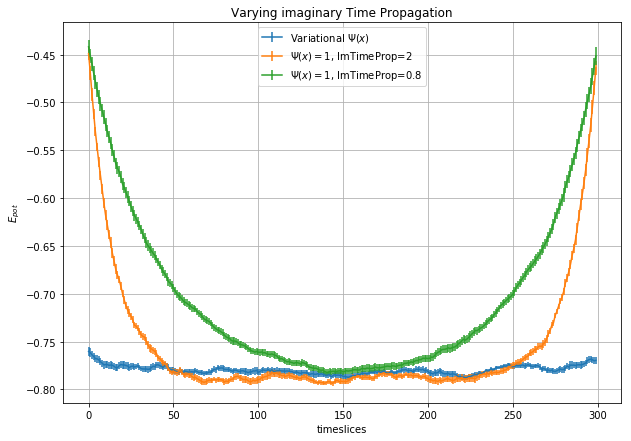

In [17]:
xpotv, Epotv, sigmapotv=np.loadtxt('QMC_1D/Var_PIGS/T2/potential.dat', usecols=(0,1,2), unpack='true')
xpotc, Epotc, sigmapotc=np.loadtxt('QMC_1D/Cost_PIGS/T2/potential.dat', usecols=(0,1,2), unpack='true')
xpotc08, Epotc08, sigmapotc08=np.loadtxt('QMC_1D/Cost_PIGS/T08/potential.dat', usecols=(0,1,2), unpack='true')

plt.figure(figsize=(10,7))

plt.errorbar(xpotv, Epotv, yerr=sigmapotv, label='Variational $\Psi(x)$')
plt.errorbar(xpotc, Epotc, yerr=sigmapotc, label='$\Psi(x)=1$, ImTimeProp=2')
plt.errorbar(xpotc08, Epotc08, yerr=sigmapotc08, label='$\Psi(x)=1$, ImTimeProp=0.8')

plt.title("Varying imaginary Time Propagation")
plt.xlabel("timeslices")
plt.ylabel("$E_{pot}$")
plt.legend()
plt.grid()
plt.show()

### PIMC Algorithm (T>0)

La distribuzione di probabilità, alzando la temperatura, varia poichè si va a popolare anche stati eccitati. L'energia potenziale, inoltre,  è più alta.

In [13]:
w8gs, psi2var8gs = np.loadtxt("QMC_1D/Var_PIGS/T8/probability.dat", usecols=(0,1), unpack='true')
w8mc, psi2var8mc = np.loadtxt("QMC_1D/Var_PIMC/T1.25/probability.dat", usecols=(0,1), unpack='true')
w8mc2, psi2var8mc2 = np.loadtxt("QMC_1D/Var_PIMC/T2.25/probability.dat", usecols=(0,1), unpack='true')
w8mc3, psi2var8mc3 = np.loadtxt("QMC_1D/Var_PIMC/T3.25/probability.dat", usecols=(0,1), unpack='true')
w8mc5, psi2var8mc5 = np.loadtxt("QMC_1D/Var_PIMC/T5.25/probability.dat", usecols=(0,1), unpack='true')
w8mc10, psi2var8mc10 = np.loadtxt("QMC_1D/Var_PIMC/T10.25/probability.dat", usecols=(0,1), unpack='true')
w8mc50, psi2var8mc50 = np.loadtxt("QMC_1D/Var_PIMC/T50.25/probability.dat", usecols=(0,1), unpack='true')

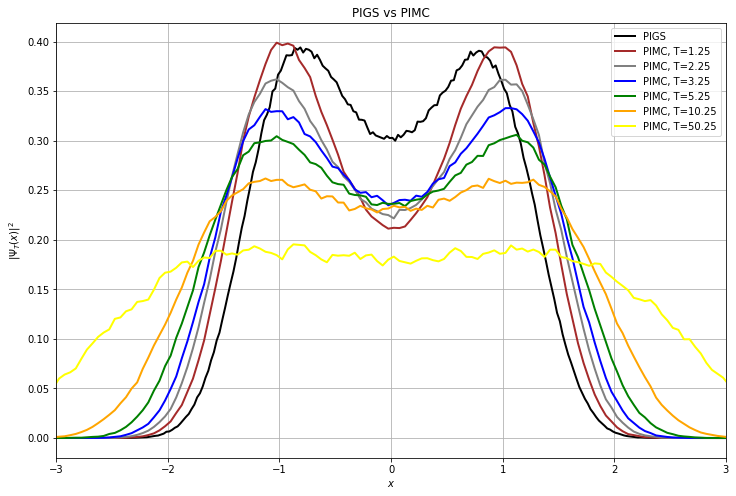

In [18]:
plt.figure(figsize=(12,8))
#plt.bar(b,h, align='center', width=0.08, label="Sampled |$\Psi_T(x)|^2$")
#plt.plot(y, fz2(y)/norm, label="Analitical solution", color="green", linewidth=3)
plt.title('PIGS vs PIMC')
plt.xlabel(r'$x$')
plt.ylabel("$|\Psi_T(x)|^2$")

plt.plot(w8gs,psi2var8gs, label="PIGS", color="black", linewidth=2)
plt.plot(w8mc,psi2var8mc, label="PIMC, T=1.25", color="brown", linewidth=2)
plt.plot(w8mc2,psi2var8mc2, label="PIMC, T=2.25", color="grey", linewidth=2)
plt.plot(w8mc3,psi2var8mc3, label="PIMC, T=3.25", color="blue", linewidth=2)
plt.plot(w8mc5,psi2var8mc5, label="PIMC, T=5.25", color="green", linewidth=2)
plt.plot(w8mc10,psi2var8mc10, label="PIMC, T=10.25", color="orange", linewidth=2)
plt.plot(w8mc50,psi2var8mc50, label="PIMC, T=50.25", color="yellow", linewidth=2)

plt.grid(True)
plt.xlim((-3,3))
plt.legend()
plt.show()